In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../src/')
import utils as ut
import avida as avida
import evals as evals

In [2]:
X=np.loadtxt("../data/s2_mapped1.txt")
y=np.loadtxt("../data/s2_mapped2.txt")
(n1, d1) = X.shape
(n2, d2) = y.shape
print("Dimensions of input datasets are: ", "X= ", X.shape, " Y= ", y.shape)
our_normalize=0

Y1, Y2 = avida.avida_tsne(X,y,perplexity=60.0,alpha=0.9,normalize=our_normalize,visualize=0,graph_dist=True)

circular_frustrum_FOSCTTM_avida = np.mean(evals.calc_domainAveraged_FOSCTTM(Y1, Y2))
circular_frustrum_integration_avida = evals.integration_score(Y1,Y2)
circular_frustrum_vision_loss_avida = evals.vis_loss(X,y,Y1,Y2,our_normalize)
circular_frustrum_alignment_avida = evals.test_alignment_score(Y1,Y2)
circular_frustrum_accuracy_ours_avida = evals.our_accuracy(Y1, Y2)

print('AVIDA FOSCTTM score: '+str(circular_frustrum_FOSCTTM_avida))
print('AVIDA Integration score: '+str(circular_frustrum_integration_avida))
print('AVIDA t-SNE Loss: '+str(circular_frustrum_vision_loss_avida))
print('AVIDA Alignment Score: '+str(circular_frustrum_alignment_avida))
print('AVIDA Our Accuracy Score: '+str(circular_frustrum_accuracy_ours_avida))

Dimensions of input datasets are:  X=  (300, 2000)  Y=  (300, 1000)
Computing pairwise distances...
Computing P-values for point 0 of 300...
Mean value of sigma: 18.242690
Computing pairwise distances...
Computing P-values for point 0 of 300...
Mean value of sigma: 12.784202
Iteration 100: error is 19.290347
Iteration 200: error is 19.215976
Iteration 300: error is 0.336148
It.  |Err         
-------------------
    0|3.118793e-03|
   10|5.298135e-04|
   20|2.734849e-04|
   30|2.284706e-04|
   40|2.341218e-04|
   50|1.972281e-04|
   60|2.671165e-04|
   70|2.503326e-04|
   80|1.460614e-04|
   90|1.115875e-04|
  100|9.109046e-05|
0.03217340090826469
Iteration 400: error is 0.286748
It.  |Err         
-------------------
    0|3.100030e-03|
   10|5.189031e-04|
   20|2.460864e-04|
   30|1.791423e-04|
   40|1.860037e-04|
   50|2.257561e-04|
   60|1.218031e-04|
   70|8.095579e-05|
0.03334369537345051
Iteration 500: error is 0.285963
It.  |Err         
-------------------
    0|3.041656e-03|


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Colored based on cell')

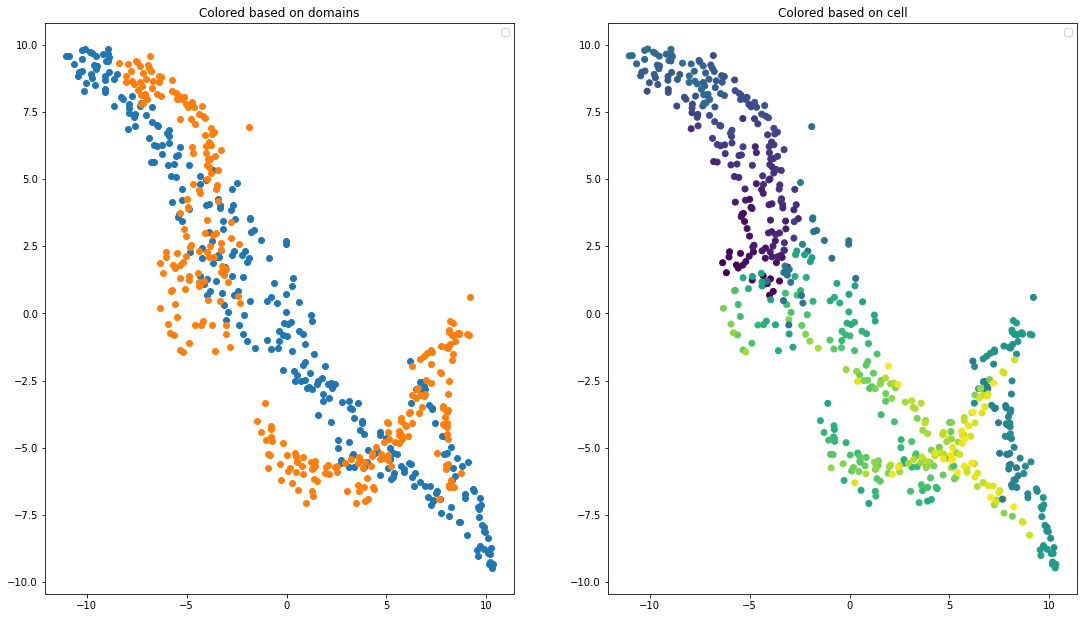

In [7]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)

axs[0].scatter(Y2[:,0],Y2[:,1])
axs[0].scatter(Y1[:,0],Y1[:,1])
axs[0].legend()
axs[0].set_title("Colored based on domains")

basic_labels1 = np.arange(start=0.0,stop=1.0,step=1./n1)
basic_labels2 = np.arange(start=0.0,stop=1.0,step=1./n2)

axs[1].scatter(Y2[:,0],Y2[:,1],c=basic_labels2)
axs[1].scatter(Y1[:,0],Y1[:,1],c=basic_labels1)
axs[1].legend()
axs[1].set_title("Colored based on cell")